Final Project: Stock Data
Karsten

In [9]:
!pip install yfinance
!pip install pandas
!pip install nbformat

In [35]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [36]:
"1) Extracting Tesla Stock Data Using yfinance"

tsla = yf.Ticker("TSLA")

tesla_data = tsla.history(period = "max")

tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [37]:
"2) Extracting Tesla Revenue Data Using Webscraping"

url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

soup = BeautifulSoup(response.content,"html.parser")

tables = soup.find_all('table')
relevant_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        relevant_table = table

In [74]:
tesla_revenue = pd.DataFrame(columns=["Data", "Revenue"])

rows = []

for row in relevant_table.find_all('tr'):
    cols = row.find_all('td')
    if len(cols) >= 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        
        revenue = revenue.replace('$', '').replace(',', '')
        
        revenue = pd.to_numeric(revenue)
        
        rows.append({"Date": date, "Revenue": revenue})


tesla_revenue = pd.DataFrame(rows)

tesla_revenue.head()

,Date,Revenue
0,2022-09-30,21454.0
1,2022-06-30,16934.0
2,2022-03-31,18756.0
3,2021-12-31,17719.0
4,2021-09-30,13757.0


In [84]:
"3) Extracting GameStop Stock Data Using yfinance"

gme = yf.Ticker("GME")
gme_data = gme.history(period = "max")
gme_data.reset_index(inplace=True)
gme_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
5675,2024-08-30 00:00:00-04:00,21.82,23.480000,21.730000,23.420000,15680700,0.0,0.0
5676,2024-09-03 00:00:00-04:00,24.15,24.690001,22.820000,23.139999,11350500,0.0,0.0
5677,2024-09-04 00:00:00-04:00,22.85,23.709999,22.110001,22.120001,6700900,0.0,0.0
5678,2024-09-05 00:00:00-04:00,22.00,22.680000,21.660000,22.389999,5101200,0.0,0.0
5679,2024-09-06 00:00:00-04:00,22.40,24.480000,21.799999,23.920000,23758400,0.0,0.0


In [40]:
"4) Extracting GameStop Revenue Data Using Webscraping"

url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)

soup = BeautifulSoup(response.content,"html.parser")

tables = soup.find_all("tbody")[1]

In [80]:
gme_revenue = pd.DataFrame(columns=['Date', "Revenue"])

rows = []

for row in tables('tr'):
    cols = row.find_all('td')
    if len(cols) >= 2:
        Date = cols[0].text.strip()
        revenue = cols[1].text.strip()
     
        revenue = revenue.replace('$', '').replace(',', '')
       
        rows.append({"Date": Date, "Revenue": revenue})


gme_revenue = pd.DataFrame(rows)

gme_revenue.head()

,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548


In [46]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [ ]:
"5) Tesla Stock and Revenue Dashboard"
make_graph(tesla_data, tesla_revenue, 'Tesla')

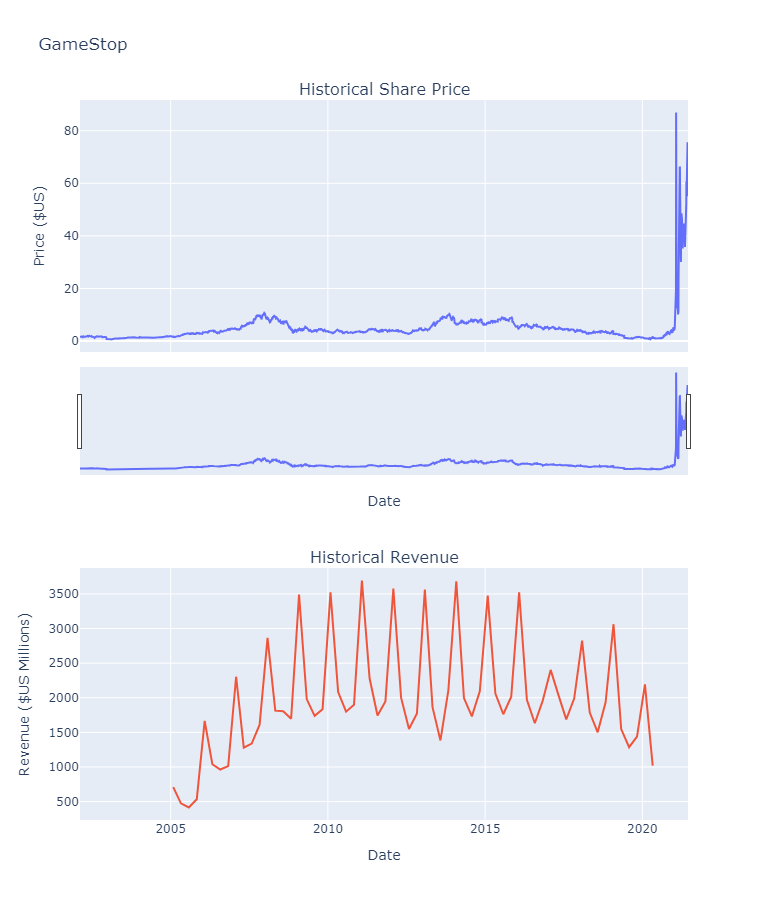

In [85]:
"6) GameStop Stock and Revenue Dashboard"
make_graph(gme_data, gme_revenue, 'GameStop')